In [2]:
import mss
import uuid
import time
from PIL import Image
import numpy as np
import os
from io import BytesIO
import asyncio

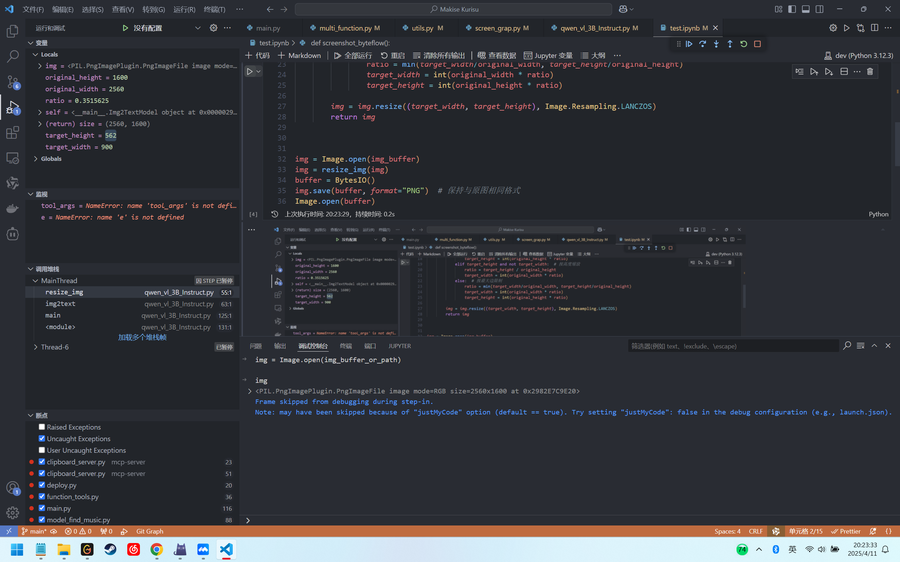

In [5]:
def screenshot_byteflow():
    with mss.mss() as sct:
        # 获取主显示器参数
        monitor = sct.monitors[1]  # 0为所有显示器，1为主屏
        screenshot = sct.grab(monitor)
        img_byte = mss.tools.to_png(screenshot.rgb, screenshot.size)
        img_buffer = BytesIO(img_byte)
        return img_buffer
img_buffer = screenshot_byteflow()


def resize_img(img, target_width=900, target_height=675):
        original_width, original_height = img.size
        if (original_width * original_height) > (target_width * target_height):
            # 计算等比例尺寸
            if target_width and not target_height:  # 按宽度缩放
                ratio = target_width / original_width
                target_height = int(original_height * ratio)
            elif target_height and not target_width:  # 按高度缩放
                ratio = target_height / original_height
                target_width = int(original_width * ratio)
            else:  # 按最大边限制
                ratio = min(target_width/original_width, target_height/original_height)
                target_width = int(original_width * ratio)
                target_height = int(original_height * ratio)

        img = img.resize((target_width, target_height), Image.Resampling.LANCZOS)
        return img



img = Image.open(img_buffer)
img = resize_img(img)
buffer = BytesIO()
img.save(buffer, format="PNG")  # 保持与原图相同格式
Image.open(buffer)